In [1]:
import sys

In [32]:
!{sys.executable} -m pip install -r ../requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 21.9 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip


In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import kagglehub
import os

def myconvolve2d(img, kernel):
    kernel_height = kernel.shape[0]
    kernel_height_halved = int((kernel_height-1)/2)
    kernel_width = kernel.shape[1]
    kernel_width_halved = int((kernel_width-1)/2)
    img = np.pad(img, ((kernel_height_halved, kernel_height_halved), 
                    (kernel_width_halved, kernel_width_halved)), 
                mode='constant', constant_values=0)
    img_height = img.shape[0]
    img_width = img.shape[1]
    convolution = []
    # start at row kernel_height_halved, end at row img_height-kernel_height_halved
    for i in range(kernel_height_halved, img_height-kernel_height_halved):
        lst = []
        # start at col kernel_width_halved, end at col img_width-kernel_height_halved
        for j in range(kernel_width_halved, img_width-kernel_width_halved):
            lst.append((img[i-kernel_height_halved:i+kernel_height_halved+1,
                            j-kernel_width_halved:j+kernel_width_halved+1] * kernel).sum().item())
        convolution.append(lst)
    return np.array(convolution)


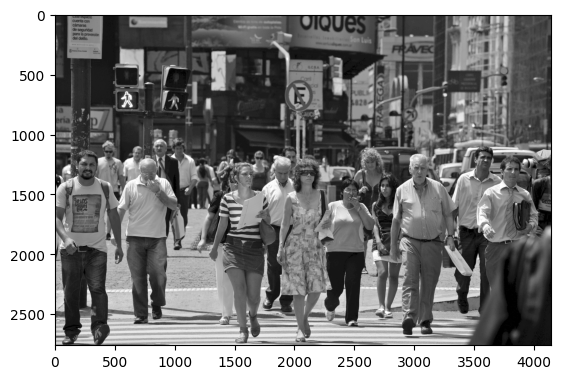

In [17]:
img = cv2.imread("../pedestrians.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [25]:
print(os.listdir("/Users/anvay-coder/Downloads/human-detection-dataset/0"))
print(os.listdir("/Users/anvay-coder/Downloads/human-detection-dataset/1"))

['348.png', '360.png', '176.png', '88.png', '162.png', '189.png', '77.png', '63.png', '228.png', '200.png', '214.png', '215.png', '201.png', '229.png', '62.png', '188.png', '76.png', '163.png', '177.png', '89.png', '361.png', '349.png', '149.png', '161.png', '175.png', '60.png', '74.png', '48.png', '217.png', '203.png', '202.png', '216.png', '49.png', '75.png', '61.png', '174.png', '160.png', '148.png', '164.png', '170.png', '158.png', '59.png', '65.png', '71.png', '212.png', '206.png', '207.png', '213.png', '70.png', '64.png', '58.png', '159.png', '171.png', '165.png', '359.png', '173.png', '167.png', '99.png', '8.png', '72.png', '198.png', '66.png', '205.png', '211.png', '239.png', '238.png', '210.png', '204.png', '199.png', '67.png', '73.png', '9.png', '166.png', '98.png', '172.png', '358.png', '317.png', '303.png', '129.png', '115.png', '101.png', '14.png', '28.png', '263.png', '277.png', '288.png', '289.png', '276.png', '262.png', '29.png', '15.png', '100.png', '114.png', '128.png

In [56]:
# Load labeled datasets
IMG_DIR = "/Users/anvay-coder/Downloads/human-detection-dataset/"
STANDARD_SIZE = (256, 256)  # width x height constant to ensure constant feature vector length

images_0 = []
images_1 = []

for label in ["0", "1"]:
    folder_path = os.path.join(IMG_DIR, label)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, STANDARD_SIZE)
        if label == "0":
            images_0.append(img)
        elif label == "1":
            images_1.append(img)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [57]:
def compute_hog(img, cell_size=8, block_size=2, num_bins=9):
    gx = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0)
    gy = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1)

    magnitude = np.sqrt(gx**2 + gy**2)
    angle = np.rad2deg(np.atan2(gy, gx)) % 180 # so angle is [0, 180)
    bin_partition_size = 180 / num_bins

    H, W = img.shape
    n_cells_x = W // cell_size
    n_cells_y = H // cell_size
    
    # hist stores a value for each cell y,x for each directional bin
    hist = np.zeros((n_cells_y, n_cells_x, num_bins))

    for i in range(n_cells_y):
        for j in range(n_cells_x):
            mag = magnitude[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
            ang = angle[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]

            # histogram entry for this cell, calculated
            for m in range(cell_size):
                for n in range(cell_size):
                    # bin index based on what bin partition the current cell's angle falls in
                    bin = int(ang[m, n] / bin_partition_size)
                    hist[i, j, bin] += mag[m, n]

    # normalize over blocks
    blocks = []
    for i in range(n_cells_y - block_size + 1):
        for j in range(n_cells_x - block_size + 1):
            # get the flattened block corresponding to current cell
            block = hist[i:i+block_size, j:j+block_size, :].flatten()
            # get norm of block with some small error added ensuring nonzero norm
            norm = np.linalg.norm(block) + 1e-6
            # add normalized block to blocks arr
            blocks.append(block / norm)
    # compress all normalized block arrays into one feature vector/arr
    return np.concatenate(blocks)

In [58]:
data = [(compute_hog(img), 0) for img in images_0] + [(compute_hog(img), 1) for img in images_1]

In [66]:
# linear SVC (Support Vector Classifier)
from sklearn.svm import LinearSVC
# standardizing preprocessor that scales the data to have mean 0 and variance 1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = np.array([x for x, _ in data])
y = np.array([y for _, y in data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [67]:
# linear support vector classifier
clf = LinearSVC()

# train the classifier
clf.fit(X_train, y_train)

/Users/anvay-coder/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [68]:
# evaluate model
from sklearn.metrics import accuracy_score

y_test_pred = clf.predict(X_test)
print("Training accuracy:", accuracy_score(y_test, y_test_pred))

Training accuracy: 0.6756756756756757


In [71]:
# scores and labels from test set
scores = clf.decision_function(X_test)
labels = y_test

# sort descending by score
sorted_idx = np.argsort(-scores)
scores = scores[sorted_idx]
labels = labels[sorted_idx]

# total negatives for FPPW denominator
total_neg = np.sum(labels == 0)

miss_rates = []
fppw = []

tp = 0
fp = 0
fn = np.sum(labels == 1)

for i in range(len(scores)):
    if labels[i] == 1:
        # correctly detected positive
        tp += 1
        fn -= 1
    else:
        # incorrectly detected positive
        fp += 1

    miss_rate = fn / (tp + fn + 1e-9)
    fppw_val = fp / (total_neg + 1e-9)

    miss_rates.append(miss_rate)
    fppw.append(fppw_val)

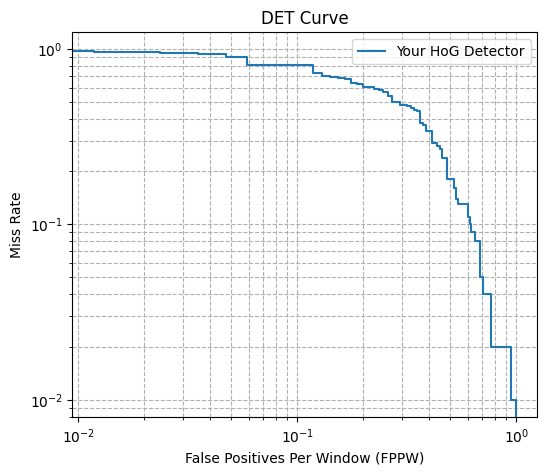

In [ ]:
plt.figure(figsize=(6, 5))
plt.loglog(fppw, miss_rates, label="Your HoG Detector")
plt.xlabel("False Positives Per Window (FPPW)")
plt.ylabel("Miss Rate")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.title("DET Curve")
plt.show()